In [1]:
#This notebook is a mean to genorate x addresses, then add in names, age, phone number, emails address
# https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/export/?sort=-rank

# logic

# find the top 22 cities by popluation - done
# bound the geo location plus or minus - done
# for each location find the address - done
# format - for storage - pandas, csv - done
# store - done
# then add names and phone number and email - done
# repeat on a smaller scall for employees and different cities - done

#  as we are playing with a rental car, it is assumed that the cusomter base come form the USA  for a simple case

In [3]:
import csv 
import pandas as pd
import random 
import numpy as np
import names
import matplotlib.pyplot as plt

In [4]:
# generator random varation of coordinates

def coordinates_plus_minus(value):
    rand_1 = random.randint(-5000000, 5000000)/100000000.0
    value_float = float(value) + float(rand_1)
    value_plus_minus = ((int(value_float * 10000000))/10000000.0)
    
    return (value_plus_minus)

In [5]:
# the address look up function

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

def geoconverter(lat, long):
    geolocator = Nominatim(user_agent="application")
    reverse = RateLimiter(geolocator.reverse, min_delay_seconds=random.randint(0,5))
    location = reverse((lat, long), language='en', exactly_one=True)
    
    return ( location.raw )

In [6]:
# creating a table of  addresses

def geo_to_panda(x_1, y_1):
    dict_ = geoconverter(x_1, y_1)
    table = pd.DataFrame([dict_])
    df2 = pd.json_normalize(table['address'])
    table = table.append(df2)
    table = table.head(1).combine_first(table.tail(1))
    
    return (table)

In [7]:
# generator a random email address

def email_add(file_create_type, nameFirst, nameLast):
    invalid_choices = [32,34,40,41,44,58,59,60,61,62,64,91,92,93]
    valid_choices = list(set(range(65,125)) - set(invalid_choices))
    length = random.randint(5, 20)

    def generate_content(length):
        return [pick_letter() for _ in range(length)]

    def pick_letter():
        return chr(random.choice(valid_choices))
    
    if file_create_type == 'customer':
        email_address = ''.join(generate_content(length))+'@gamil.com'
    if file_create_type == 'employee':
        email_address = ''.join(nameFirst+'_'+nameLast)+'@drexelrental.com'
        
    return(email_address)

In [8]:
# https://www.allareacodes.com/area_code_listings_by_state.htm
# stored as area_code_lookup.csv

def area_c(state, df_area_code):
    try:
        index_num = int(df_area_code[df_area_code['state']==state].index[0])
        area_code_list = df_area_code.iloc[index_num,1]
        area_code_list_length = len(area_code_list)
        area_code_length = round((area_code_list_length/5), 0)-1
        select = random.randint(0, area_code_length)
        state_code = area_code_list[(select*5):(select*5)+3]
    except:
        state_code = '100'

    return(state_code) 

In [9]:
# create the person data file: nameFirst, nameLast, age, area_code, phone_number, email, for customers or emoliyees

def sim_personal_data(file_create_type, state_area_code, df_area_code):
    nameFirst = names.get_first_name()
    nameLast = names.get_last_name()
    if file_create_type == 'customer':
        age = random.randint(18, 80)
        area_code = area_c(df_area_code, state_area_code)
        phone_number = str(area_code)+"-"+str(random.randint(100, 999))+"-"+str(random.randint(1000, 9999))
    if file_create_type == 'employee':
        age = random.randint(23, 55)
        area_code = area_c(df_area_code, state_area_code)
        phone_number = str(area_code)+"-"+str(random.randint(100, 999))+"-"+str(random.randint(1000, 9999))
    email = email_add(file_create_type, nameFirst, nameLast)
 
    return (nameFirst, nameLast, age, area_code, phone_number, email)

In [10]:
# use the above function th ebelow file to create a list of person details 
# place_id, licence, osm_type, osm_id, lat, lon, display_name, address, boundingbox, nameFirst, nameLast, 
# age, area_code, phone_number, email

def list_create(run_count, file_create_type):
    df = pd.DataFrame([[]])
    df_2 = pd.DataFrame([[]])
    df_results = pd.DataFrame([[]])
    df_results_2 = pd.DataFrame([[0,0,0,0,0,0]])

    if file_create_type == 'customer':
        file_in = './data/22_customer_city_coordinates.csv'
        df_area_code = pd.read_csv("./data/area_code_lookup.csv", header = 0)
        file_out = './data/customer_coordinate_matrix.csv'
        file_out_2 = './data/address_matrix.csv'
        file_out_3 = './data/address_email_matrix.csv'
        file_out_4 = './data/customer_list.csv' # this is the one
        random.seed(12345)
        np.random.seed(12345)
        print(file_create_type)

    if file_create_type == 'employee':
        file_in = './data/6_site_employee_coordinates.csv'
        df_area_code = pd.read_csv("./data/area_code_lookup.csv", header = 0)
        file_out = './data/employee_coordinate_matrix.csv'
        file_out_2 = './data/employee_address_matrix.csv'
        file_out_3 = './data/employee_address_email_matrix.csv'
        file_out_4 = './data/employee_list.csv'  # this is the one
        random.seed(54321)
        np.random.seed(54321)

    df = pd.read_csv(file_in, header = 0)
    df = df[['lat','long']]
    for index, row in df.iterrows():
        for j in range(0,run_count):
            x = coordinates_plus_minus(row['lat'])
            for k in range(0,run_count):
                y = coordinates_plus_minus(row['long'])
                results = x, y, int(j)
            df_2 = df_2.append([results])
    df_2 = df_2.dropna()        
    df_2 = df_2.reset_index()
    df_2.to_csv(file_out)
    
    for index, row in df_2.iterrows():
        try:
            results = geoconverter(df_2.loc[index,0], df_2.loc[index,1])
        except:
            results = {place_id:0, licence:0, osm_type:0, osm_id:0, lat:df_2.loc[index,0], lon:df_2.loc[index,1], display_name:0, address:0}

        df_results = df_results.append([results])
        df_results.to_csv(file_out_2)
    
        if file_create_type == 'customer':
            try:
                state_area_code = results['address']['state']
            except:
                state_area_code = 'Blank'

        if file_create_type == 'employee':
            try:
                state_area_code = results['address']['Pennsylvania']
            except:
                state_area_code = 'Blank'

        results_2 = sim_personal_data(file_create_type, state_area_code, df_area_code)
        df_results_2 = df_results_2.append([results_2])

    df_results_2.columns = ['nameFirst', 'nameLast', 'age', 'area_code', 'phone_number', 'email']
    df_results_2.to_csv(file_out_3)
    df_results = pd.concat([df_results, df_results_2], axis=1, sort=False)
    df_results = df_results.dropna()
    df_results = df_results.reset_index()
    df_results = df_results.drop(['index'], axis=1)
    df_results.to_csv(file_out_4)
    
    return

In [11]:
#list_create(500, 'customer')
list_create(65, 'employee')

,Unnamed: 0,place_id,licence,osm_type,osm_id,lat,lon,display_name,address,boundingbox,nameFirst,nameLast,age,area_code,phone_number,email
0,0,264490742.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,2.090242e+08,39.906594,-75.306454,"738, South Avenue, Wyndom, Springfield, Delawa...","{'house_number': '738', 'road': 'South Avenue'...","['39.90649398738', '39.90669398738', '-75.3065...",Casey,Roberts,46,100,100-745-5055,Casey_Roberts@drexelrental.com
1,1,74419377.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6.495446e+09,39.867055,-75.302024,"Action Rental, Industrial Highway, Westinghous...","{'address29': 'Action Rental', 'road': 'Indust...","['39.8669554', '39.8671554', '-75.3021238', '-...",Susan,Choi,44,100,100-507-7725,Susan_Choi@drexelrental.com
2,2,120549356.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,1.419736e+08,39.846300,-75.261693,"Dock Road, Paulsboro Refinery, Billingsport, P...","{'road': 'Dock Road', 'industrial': 'Paulsboro...","['39.8451052', '39.8472429', '-75.2686256', '-...",Jerry,Destefano,30,100,100-709-6184,Jerry_Destefano@drexelrental.com
3,3,230443820.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,7.341841e+08,39.903921,-75.225309,"Piazza Honda, 6935, Essington Avenue, Elmwood ...","{'car': 'Piazza Honda', 'house_number': '6935'...","['39.9034784', '39.9042307', '-75.2256412', '-...",Warren,Clyne,38,100,100-712-4806,Warren_Clyne@drexelrental.com
4,4,83566170.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,1.220503e+07,39.882517,-75.222056,"Fort Mifflin Road, Philadelphia, Philadelphia ...","{'road': 'Fort Mifflin Road', 'city': 'Philade...","['39.882342', '39.8837827', '-75.2233219', '-7...",Bobby,Belton,50,100,100-421-2351,Bobby_Belton@drexelrental.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,200358923.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,5.433890e+08,40.601707,-75.454843,Lehigh County Authority Wastewater Treatment P...,{'address29': 'Lehigh County Authority Wastewa...,"['40.5993479', '40.6037814', '-75.4569232', '-...",Mary,Powell,46,100,100-419-5281,Mary_Powell@drexelrental.com
386,386,264758925.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,7.396938e+08,40.611359,-75.459280,"398, North Railroad Street, 1st Ward, Hanover ...","{'house_number': '398', 'road': 'North Railroa...","['40.611259', '40.611459', '-75.45938', '-75.4...",Nova,Marable,41,100,100-182-6211,Nova_Marable@drexelrental.com
387,387,126643807.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,1.695113e+08,40.700270,-75.392458,"Bath Pike, Clyde, Northampton County, Pennsylv...","{'road': 'Bath Pike', 'hamlet': 'Clyde', 'coun...","['40.6986983', '40.7024748', '-75.3931336', '-...",Leonard,Armstrong,46,100,100-614-5187,Leonard_Armstrong@drexelrental.com
388,388,168192519.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,3.543448e+08,40.638103,-75.461538,"Hanover Township, Lehigh County, Pennsylvania,...","{'city': 'Hanover Township', 'county': 'Lehigh...","['40.6376711', '40.6383883', '-75.4616549', '-...",Ann,Martinez,55,100,100-447-1069,Ann_Martinez@drexelrental.com


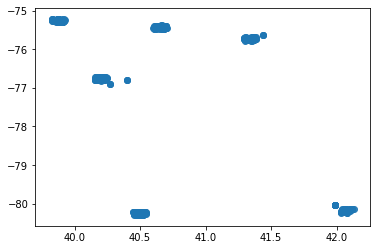

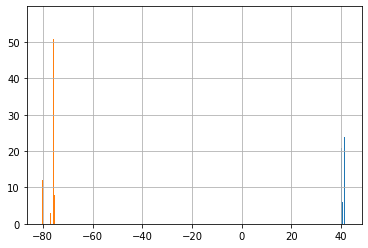

In [12]:
file = './data/employee_list.csv'
df_results = pd.read_csv(file)
display(df_results)
x = df_results['lat']
y = df_results['lon']
plt.scatter(x, y,  alpha=0.9)
plt.show()
hist_1 = df_results['lat'].hist(bins = 65)
hist_2 = df_results['lon'].hist(bins = 65)

,Unnamed: 0,place_id,licence,osm_type,osm_id,lat,lon,display_name,address,boundingbox,nameFirst,nameLast,age,area_code,phone_number,email
0,0,259438929.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.684146e+08,40.729879,-74.010234,"95, Clarkson Street, West Village, New York, M...","{'house_number': '95', 'road': 'Clarkson Stree...","['40.729779', '40.729979', '-74.01033425', '-7...",Karen,Crockett,66.0,716,716-160-2501,TTlogkBOfQX@gmail.com
1,1,180954517.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.158827e+08,40.727103,-74.019003,"Holland Tunnel, Hudson Square, Manhattan Commu...","{'road': 'Holland Tunnel', 'suburb': 'Hudson S...","['40.7233639', '40.7274475', '-74.0211317', '-...",John,Bailey,51.0,640,640-925-7076,OYp`p_ab_R^vFBpYrW@gmail.com
2,2,97971897.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.662938e+07,40.710783,-73.983728,"Front Street, Lower East Side, New York, Manha...","{'road': 'Front Street', 'suburb': 'Lower East...","['40.7107224', '40.7108766', '-73.9847108', '-...",Paula,Welborn,36.0,212,212-880-4934,SaEms@gmail.com
3,3,82513541.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,5.681925e+06,40.699473,-74.014868,"Hugh L. Carey Tunnel, Battery Park City, Manha...","{'road': 'Hugh L. Carey Tunnel', 'suburb': 'Ba...","['40.6817897', '40.705292', '-74.0156926', '-7...",Francisco,Gagnon,31.0,845,845-277-5582,zyDfKUilFn{bjDNp{p@gmail.com
4,4,152528018.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,2.783260e+08,40.743230,-73.975773,"Kips Bay Tower North, East 33rd Street, Kips B...","{'address29': 'Kips Bay Tower North', 'road': ...","['40.7428946', '40.7435644', '-73.9764296', '-...",Donald,Brokaw,44.0,607,607-866-3679,EmTuHzSX{|Z@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,10495,24661490.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,2.421391e+09,47.624099,-122.370817,"Terminal 86 Grain Facility, Seattle, King Coun...","{'locality': 'Terminal 86 Grain Facility', 'ci...","['47.6040991', '47.6440991', '-122.3908168', '...",Melvin,Lambert,63.0,360,360-763-7591,IuGdm_bszWzXFP@gmail.com
10496,10496,351812.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,1.509355e+08,47.613231,-122.345361,"Belltown, Seattle, King County, Washington, 98...","{'suburb': 'Belltown', 'city': 'Seattle', 'cou...","['47.5732311', '47.6532311', '-122.3853607', '...",Betty,France,79.0,509,509-272-5515,R_|zDh@gmail.com
10497,10497,130665420.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,1.912792e+08,47.592989,-122.293060,"1107, 31st Avenue South, Leschi, Seattle, King...","{'house_number': '1107', 'road': '31st Avenue ...","['47.5929571', '47.5930443', '-122.2931566', '...",Anna,Allen,61.0,253,253-979-4922,lSzIlwd^HFuBZ@gmail.com
10498,10498,141909983.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,2.261977e+08,47.589607,-122.341622,"1519, Alaskan Way South, West Edge, Internatio...","{'house_number': '1519', 'road': 'Alaskan Way ...","['47.5894391', '47.5897655', '-122.3420599', '...",Judith,Brown,56.0,509,509-881-2878,^ktTc@gmail.com


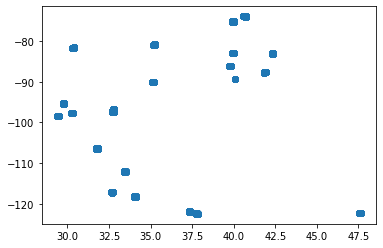

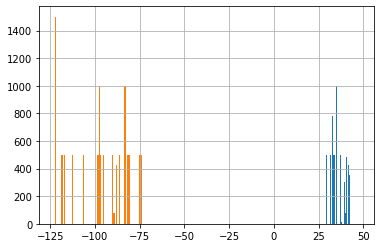

In [13]:
file = './data/customer_list.csv'
df_results = pd.read_csv(file)
display(df_results)
x = df_results['lat']
y = df_results['lon']
plt.scatter(x, y,  alpha=0.9)
plt.show()
hist = df_results['lat'].hist(bins = 65)
hist = df_results['lon'].hist(bins = 65)